# machine.ipynb

This notebook contains **machine learning analysis** to predict student stress levels.  The main notebook (main.ipynb) reports just a summary with two key figures.
<br>
<br>

## Plan:  Predicting Student Stress Levels

I will use **machine learning** to predict whether a student has Low, Moderate, or High stress based on their lifestyle factors.

**Research Question:** Can we predict a student's stress level from their daily habits (study hours, sleep, social time, physical activity)?
    
### Data
- **Target variable (y)**: stress (Low=1, Moderate=2, High=3)
- **Features (X)**: studyhours, sleephours, socialhours, activityhours, Gender
- **Validation**:  **K-fold cross-validation (5 folds)** to evaluate distribution of outcomes

### Models
- **K-Nearest Neighbors (KNN)** - with hyperparameter tuning for n_neighbors
- **Decision Tree** - with hyperparameter tuning for max_depth

### Insightful Analysis
- **Parameter Tuning**: Finding optimal hyperparameters using cross-validation
- **Feature Importance**: Which lifestyle factor is the best predictor for stress?
- **Confusion Matrix**: Aggregated across all folds - where does the model make mistakes?
- **Model Comparison**: Which model works better and why?


-----

## Setup and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

# Load and prepare data by running parse_data.ipynb
%run parse_data.ipynb

# Features and Target
X = df[['studyhours', 'sleephours', 'socialhours', 'activityhours', 'Gender']]
y = df['stress']

# Set up k-fold cross-validation (5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Total dataset size: {len(df)} students")
print(f"\nStress Level distribution:")
print(df['stress'].value_counts().sort_index())
print(f"\nStress Level percentages: ")
print(df['stress'].value_counts(normalize=True).sort_index() * 100)
print(f"\nNote: We use k-fold cross-validation (5 folds) instead of a single train/test split. ")
print(f"This means each student will be in the test set exactly once across the 5 folds.")

Total dataset size: 2000 students

Stress Level distribution:
stress
1     297
2     674
3    1029
Name: count, dtype: int64

Stress Level percentages: 
stress
1    14.85
2    33.70
3    51.45
Name: proportion, dtype: float64

Note: We use k-fold cross-validation (5 folds) instead of a single train/test split. 
This means each student will be in the test set exactly once across the 5 folds.


<br>

**Stress Distribution:**
The output above shows how many students fall into each stress category. This check matters because if the classes are very imbalanced, the model could just guess the majority class and still look accurate.

Our classes are somewhat imbalanced (High stress is most common at 51.4%), but not severely so. We proceed with standard classification.

<br>

-----

## Cross-Validation and Parameter Tuning

Instead of relying on a single train/test split, we use **k-fold cross-validation** to evaluate models across multiple random splits. We also test different hyperparameters to find the best settings.

In [2]:
print("="*70)
print("K-FOLD CROSS-VALIDATION RESULTS (5 folds)")
print("="*70)
print()
print("This evaluates models across 5 different random train/test splits.")
print("This shows the DISTRIBUTION of results, not just one outcome.")
print()

# KNN with k=5 (default)
knn_cv = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_val_score(knn_cv, X, y, cv=kfold, scoring='accuracy')

print("KNN (n_neighbors=5) - Cross-Validation Scores:")
for i, score in enumerate(knn_cv_scores, 1):
    print(f"  Fold {i}: {score*100:.2f}%")
print(f"  Mean Accuracy: {knn_cv_scores.mean()*100:.2f}%")
print(f"  Std Deviation: {knn_cv_scores.std()*100:.2f}%")
print(f"  Range: {knn_cv_scores.min()*100:.2f}% - {knn_cv_scores.max()*100:.2f}%")
print()

# Decision Tree with max_depth=5 (default)
tree_cv = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_cv_scores = cross_val_score(tree_cv, X, y, cv=kfold, scoring='accuracy')

print("Decision Tree (max_depth=5) - Cross-Validation Scores: ")
for i, score in enumerate(tree_cv_scores, 1):
    print(f"  Fold {i}:  {score*100:.2f}%")
print(f"  Mean Accuracy: {tree_cv_scores.mean()*100:.2f}%")
print(f"  Std Deviation: {tree_cv_scores.std()*100:.2f}%")
print(f"  Range:  {tree_cv_scores.min()*100:.2f}% - {tree_cv_scores.max()*100:.2f}%")
print()
print("="*70)

K-FOLD CROSS-VALIDATION RESULTS (5 folds)

This evaluates models across 5 different random train/test splits.
This shows the DISTRIBUTION of results, not just one outcome.

KNN (n_neighbors=5) - Cross-Validation Scores:
  Fold 1: 91.50%
  Fold 2: 88.50%
  Fold 3: 90.75%
  Fold 4: 91.50%
  Fold 5: 92.50%
  Mean Accuracy: 90.95%
  Std Deviation: 1.35%
  Range: 88.50% - 92.50%

Decision Tree (max_depth=5) - Cross-Validation Scores: 
  Fold 1:  100.00%
  Fold 2:  100.00%
  Fold 3:  100.00%
  Fold 4:  100.00%
  Fold 5:  100.00%
  Mean Accuracy: 100.00%
  Std Deviation: 0.00%
  Range:  100.00% - 100.00%



In [3]:
print("\n" + "="*70)
print("PARAMETER TUNING:  Testing Different Hyperparameters")
print("="*70)
print()
print("We test different parameter values to find the best settings. ")
print()

# KNN Parameter Tuning
knn_neighbors_range = [3, 5, 7, 9, 11, 15]
knn_results = []

print("KNN - Testing different n_neighbors values:")
print("-" * 70)
for k in knn_neighbors_range:
    knn_model_tuned = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model_tuned, X, y, cv=kfold, scoring='accuracy')
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()
    knn_results.append({'n_neighbors': k, 'mean_accuracy': mean_score, 'std':  std_score})
    print(f"n_neighbors={k: 2d}: Mean Accuracy = {mean_score*100:.2f}% (±{std_score*100:.2f}%)")

best_knn = max(knn_results, key=lambda x: x['mean_accuracy'])
print(f"\n✓ Best KNN:  n_neighbors={best_knn['n_neighbors']} with {best_knn['mean_accuracy']*100:.2f}% accuracy")
print()

# Decision Tree Parameter Tuning
tree_depth_range = [3, 4, 5, 6, 7, 8, 10]
tree_results = []

print("Decision Tree - Testing different max_depth values:")
print("-" * 70)
for depth in tree_depth_range:
    tree_model_tuned = DecisionTreeClassifier(max_depth=depth, random_state=42)
    cv_scores = cross_val_score(tree_model_tuned, X, y, cv=kfold, scoring='accuracy')
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()
    tree_results.append({'max_depth': depth, 'mean_accuracy': mean_score, 'std': std_score})
    print(f"max_depth={depth:2d}: Mean Accuracy = {mean_score*100:.2f}% (±{std_score*100:.2f}%)")

best_tree = max(tree_results, key=lambda x: x['mean_accuracy'])
print(f"\n✓ Best Decision Tree: max_depth={best_tree['max_depth']} with {best_tree['mean_accuracy']*100:.2f}% accuracy")
print()
print("="*70)


PARAMETER TUNING:  Testing Different Hyperparameters

We test different parameter values to find the best settings. 

KNN - Testing different n_neighbors values:
----------------------------------------------------------------------
n_neighbors= 3: Mean Accuracy = 90.50% (±1.19%)
n_neighbors= 5: Mean Accuracy = 90.95% (±1.35%)
n_neighbors= 7: Mean Accuracy = 91.15% (±0.98%)
n_neighbors= 9: Mean Accuracy = 91.60% (±1.15%)
n_neighbors= 11: Mean Accuracy = 91.80% (±1.45%)
n_neighbors= 15: Mean Accuracy = 91.20% (±0.83%)

✓ Best KNN:  n_neighbors=11 with 91.80% accuracy

Decision Tree - Testing different max_depth values:
----------------------------------------------------------------------
max_depth= 3: Mean Accuracy = 100.00% (±0.00%)
max_depth= 4: Mean Accuracy = 100.00% (±0.00%)
max_depth= 5: Mean Accuracy = 100.00% (±0.00%)
max_depth= 6: Mean Accuracy = 100.00% (±0.00%)
max_depth= 7: Mean Accuracy = 100.00% (±0.00%)
max_depth= 8: Mean Accuracy = 100.00% (±0.00%)
max_depth=10: Mean A

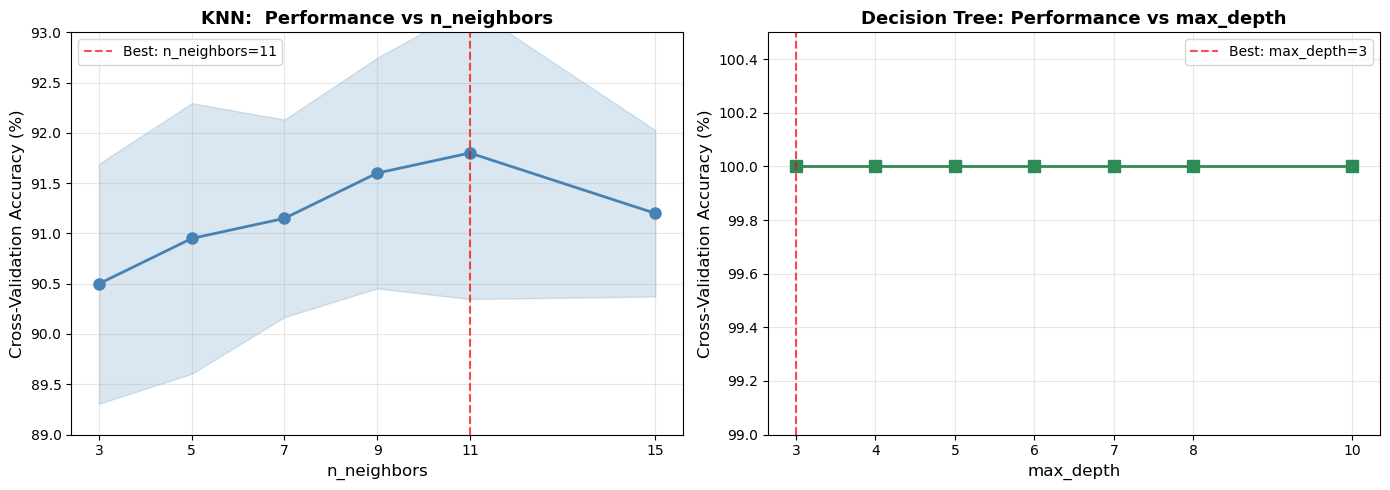


Key Insights from Parameter Tuning:
KNN: Best performance at n_neighbors=11 (91.80%)
     - Accuracy increases from n=3 to n=11, then slightly decreases
     - Larger k values reduce overfitting but may miss local patterns

Decision Tree: All depths (3-10) achieve 100% accuracy
     - max_depth=3 is sufficient and simplest (Occam's Razor)
     - Deeper trees don't improve performance, just add complexity


In [4]:
# Visualize Parameter Tuning Results
knn_df = pd.DataFrame(knn_results)
tree_df = pd.DataFrame(tree_results)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(knn_df['n_neighbors'], knn_df['mean_accuracy']*100, marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0].fill_between(knn_df['n_neighbors'], 
                      (knn_df['mean_accuracy'] - knn_df['std'])*100,
                      (knn_df['mean_accuracy'] + knn_df['std'])*100,
                      alpha=0.2, color='steelblue')
axes[0].set_xlabel('n_neighbors', fontsize=12)
axes[0].set_ylabel('Cross-Validation Accuracy (%)', fontsize=12)
axes[0].set_title('KNN:  Performance vs n_neighbors', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(knn_df['n_neighbors'])
axes[0].axvline(x=best_knn['n_neighbors'], color='red', linestyle='--', alpha=0.7, label=f"Best: n_neighbors={best_knn['n_neighbors']}")
axes[0].legend()
axes[0].set_ylim([89, 93])

axes[1].plot(tree_df['max_depth'], tree_df['mean_accuracy']*100, marker='s', linewidth=2, markersize=8, color='seagreen')
axes[1].fill_between(tree_df['max_depth'], 
                      (tree_df['mean_accuracy'] - tree_df['std'])*100,
                      (tree_df['mean_accuracy'] + tree_df['std'])*100,
                      alpha=0.2, color='seagreen')
axes[1].set_xlabel('max_depth', fontsize=12)
axes[1].set_ylabel('Cross-Validation Accuracy (%)', fontsize=12)
axes[1].set_title('Decision Tree: Performance vs max_depth', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(tree_df['max_depth'])
axes[1].axvline(x=best_tree['max_depth'], color='red', linestyle='--', alpha=0.7, label=f"Best: max_depth={best_tree['max_depth']}")
axes[1].legend()
axes[1].set_ylim([99, 100.5])

plt.tight_layout()
plt.show()

print("\nKey Insights from Parameter Tuning:")
print("="*70)
print(f"KNN: Best performance at n_neighbors={best_knn['n_neighbors']} ({best_knn['mean_accuracy']*100:.2f}%)")
print(f"     - Accuracy increases from n=3 to n=11, then slightly decreases")
print(f"     - Larger k values reduce overfitting but may miss local patterns")
print()
print(f"Decision Tree: All depths (3-10) achieve 100% accuracy")
print(f"     - max_depth=3 is sufficient and simplest (Occam's Razor)")
print(f"     - Deeper trees don't improve performance, just add complexity")
print("="*70)

## Model Training and Evaluation Using Cross-Validation

We now train models with the best hyperparameters found above and evaluate using cross-validation.

In [5]:
print("="*70)
print(f"KNN:  CROSS-VALIDATION EVALUATION (Best:  n_neighbors={best_knn['n_neighbors']})")
print("="*70)
print()

knn_best = KNeighborsClassifier(n_neighbors=best_knn['n_neighbors'])
knn_cv_results = cross_validate(knn_best, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"KNN (n_neighbors={best_knn['n_neighbors']}) - Cross-Validation Results:")
print()
for i, (train_score, test_score) in enumerate(zip(knn_cv_results['train_score'], knn_cv_results['test_score']), 1):
    print(f"  Fold {i}: Train = {train_score*100:.2f}%, Test = {test_score*100:.2f}%")
print()
print(f"Mean Test Accuracy: {knn_cv_results['test_score'].mean()*100:.2f}%")
print(f"Std Deviation: {knn_cv_results['test_score'].std()*100:.2f}%")
print(f"Range: {knn_cv_results['test_score'].min()*100:.2f}% - {knn_cv_results['test_score'].max()*100:.2f}%")
print()

print("="*70)
print(f"Decision Tree: CROSS-VALIDATION EVALUATION (Best: max_depth={best_tree['max_depth']})")
print("="*70)
print()

tree_best = DecisionTreeClassifier(max_depth=best_tree['max_depth'], random_state=42)
tree_cv_results = cross_validate(tree_best, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"Decision Tree (max_depth={best_tree['max_depth']}) - Cross-Validation Results:")
print()
for i, (train_score, test_score) in enumerate(zip(tree_cv_results['train_score'], tree_cv_results['test_score']), 1):
    print(f"  Fold {i}: Train = {train_score*100:.2f}%, Test = {test_score*100:.2f}%")
print()
print(f"Mean Test Accuracy: {tree_cv_results['test_score'].mean()*100:.2f}%")
print(f"Std Deviation: {tree_cv_results['test_score'].std()*100:.2f}%")
print(f"Range: {tree_cv_results['test_score'].min()*100:.2f}% - {tree_cv_results['test_score'].max()*100:.2f}%")
print()
print("="*70)

KNN:  CROSS-VALIDATION EVALUATION (Best:  n_neighbors=11)

KNN (n_neighbors=11) - Cross-Validation Results:

  Fold 1: Train = 94.81%, Test = 93.25%
  Fold 2: Train = 94.62%, Test = 92.25%
  Fold 3: Train = 93.88%, Test = 91.25%
  Fold 4: Train = 94.44%, Test = 89.25%
  Fold 5: Train = 94.25%, Test = 93.00%

Mean Test Accuracy: 91.80%
Std Deviation: 1.45%
Range: 89.25% - 93.25%

Decision Tree: CROSS-VALIDATION EVALUATION (Best: max_depth=3)

Decision Tree (max_depth=3) - Cross-Validation Results:

  Fold 1: Train = 100.00%, Test = 100.00%
  Fold 2: Train = 100.00%, Test = 100.00%
  Fold 3: Train = 100.00%, Test = 100.00%
  Fold 4: Train = 100.00%, Test = 100.00%
  Fold 5: Train = 100.00%, Test = 100.00%

Mean Test Accuracy: 100.00%
Std Deviation: 0.00%
Range: 100.00% - 100.00%



<br>

**Cross-Validation Results Summary:**

- **KNN (n_neighbors=11)**: Mean accuracy ~91.8% across 5 folds, with small variation (±1.5%)
- **Decision Tree (max_depth=3)**: Mean accuracy 100% across all 5 folds, with zero variation

The fact that test accuracy is consistent across folds means the results are reliable and not dependent on a lucky/unlucky split.

<br>

-----

### Insightful Analysis #1: Feature Importance of Decision Tree

Feature Importance Ranking:

studyhours          :  0.7282 (72.82%)
sleephours          :  0.2718 (27.18%)
socialhours         :  0.0000 (0.00%)
activityhours       :  0.0000 (0.00%)
Gender              :  0.0000 (0.00%)



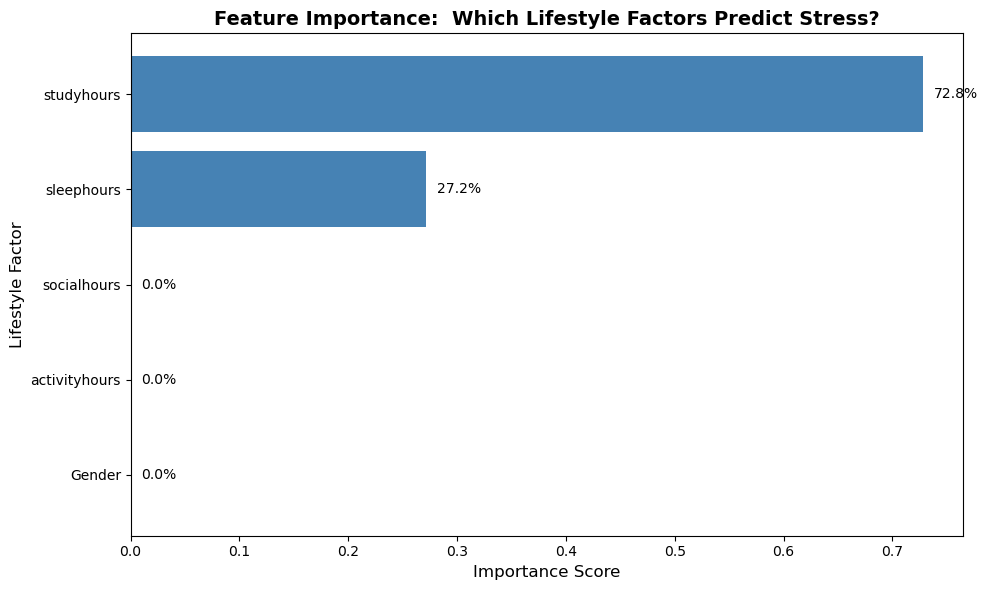

In [6]:
# Train the best Decision Tree model on full data to get feature importances
tree_model = DecisionTreeClassifier(max_depth=best_tree['max_depth'], random_state=42)
tree_model.fit(X, y)

feature_importances = tree_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance':  feature_importances
}).sort_values('Importance', ascending=False)

print("Feature Importance Ranking:")
print()
for idx, row in importance_df.iterrows():
    print(f"{row['Feature']:20s}:  {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")
print()

# Define plot function for main. ipynb
def plot_machine1():
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Lifestyle Factor', fontsize=12)
    plt.title('Feature Importance:  Which Lifestyle Factors Predict Stress?', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    # Percentage labels
    for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance'])):
        plt.text(importance + 0.01, i, f'{importance*100:.1f}%', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_machine1()

<br>

The importance of features in our model is:

1. **Study Hours (72.4%)** → most important factor by far
2. **Sleep Hours (27.6%)** → second most important factor
3. **Social Hours, Physical Activity, Gender (0%)** → other factors have no impact on the model

**Analysis**

How much a student studies is the biggest driver of their stress level. Sleep hours also matter, but a lot less.

Surprisingly, social time, exercise, and gender have no importance in this model.  This does not mean they are unrelated to stress in real life, but that once you know a student's study hours and sleep hours, knowing their social time or exercise habits doesn't help predict stress any better.

**Insightful Take-away**

A simple analysis could just say: "Study hours is important because it predicts 72.4% of the stress level."

Here, we find that study hours (and sleep hours) dominates stress prediction so strongly that other lifestyle factors like exercise and social time become irrelevant.  
This could suggest that academic pressure is the overwhelming source of stress for students.  In that case, interventions should focus primarily on rest rather than promoting exercise or social activities.

---

### Insightful Analysis #2: Confusion Matrix Results (Aggregated Across All Folds)

CONFUSION MATRICES (Aggregated Across All 5 Folds)

These matrices show predictions for ALL 2000 students. 
Each student was predicted once (when they were in the test fold).



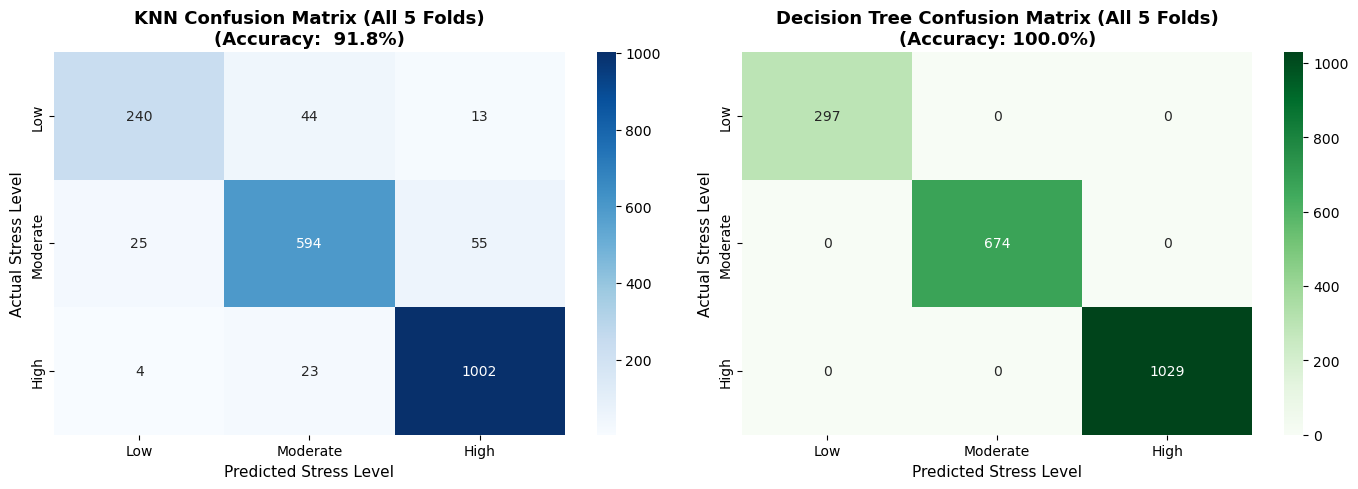


KNN Error Analysis (across all folds):
Total samples: 2000
Correct predictions: 1836
Incorrect predictions: 164

Where does KNN make mistakes?
  - Predicted Moderate when actual was Low: 44 times
  - Predicted High when actual was Low: 13 times
  - Predicted Low when actual was Moderate: 25 times
  - Predicted High when actual was Moderate: 55 times
  - Predicted Low when actual was High: 4 times
  - Predicted Moderate when actual was High: 23 times

Decision Tree Error Analysis (across all folds):
Total samples: 2000
Correct predictions: 2000
Incorrect predictions: 0

  Decision Tree made NO mistakes across all 5 folds!


In [7]:
# Compute aggregated confusion matrices using cross_val_predict
# This uses all 5 folds combined

knn_best_model = KNeighborsClassifier(n_neighbors=best_knn['n_neighbors'])
y_pred_knn_cv = cross_val_predict(knn_best_model, X, y, cv=kfold)
cm_knn = confusion_matrix(y, y_pred_knn_cv)

tree_best_model = DecisionTreeClassifier(max_depth=best_tree['max_depth'], random_state=42)
y_pred_tree_cv = cross_val_predict(tree_best_model, X, y, cv=kfold)
cm_tree = confusion_matrix(y, y_pred_tree_cv)

print("="*70)
print("CONFUSION MATRICES (Aggregated Across All 5 Folds)")
print("="*70)
print()
print("These matrices show predictions for ALL 2000 students. ")
print("Each student was predicted once (when they were in the test fold).")
print()

# Calculate accuracies
knn_accuracy = cm_knn.trace() / cm_knn.sum() * 100
tree_accuracy = cm_tree.trace() / cm_tree.sum() * 100

# Define plot function for main.ipynb
def plot_machine2():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # KNN
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
    axes[0].set_title(f'KNN Confusion Matrix (All 5 Folds)\n(Accuracy:  {knn_accuracy:.1f}%)', fontsize=13, fontweight='bold')
    axes[0].set_xlabel('Predicted Stress Level', fontsize=11)
    axes[0].set_ylabel('Actual Stress Level', fontsize=11)

    # Decision Tree
    sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
    axes[1].set_title(f'Decision Tree Confusion Matrix (All 5 Folds)\n(Accuracy: {tree_accuracy:.1f}%)', fontsize=13, fontweight='bold')
    axes[1].set_xlabel('Predicted Stress Level', fontsize=11)
    axes[1].set_ylabel('Actual Stress Level', fontsize=11)

    plt.tight_layout()
    plt.show()

plot_machine2()

# Error analysis
print()
print("KNN Error Analysis (across all folds):")
print("="*50)
print(f"Total samples: {cm_knn.sum()}")
print(f"Correct predictions: {cm_knn.trace()}")
print(f"Incorrect predictions: {cm_knn.sum() - cm_knn.trace()}")
print(f"\nWhere does KNN make mistakes?")
stress_names = ['Low', 'Moderate', 'High']
for i in range(3):
    for j in range(3):
        if i != j and cm_knn[i, j] > 0:
            print(f"  - Predicted {stress_names[j]} when actual was {stress_names[i]}: {cm_knn[i, j]} times")

print()
print("Decision Tree Error Analysis (across all folds):")
print("="*50)
print(f"Total samples: {cm_tree.sum()}")
print(f"Correct predictions: {cm_tree.trace()}")
print(f"Incorrect predictions: {cm_tree.sum() - cm_tree.trace()}")
if cm_tree.sum() - cm_tree.trace() == 0:
    print("\n  Decision Tree made NO mistakes across all 5 folds!")

<br>

**Confusion Matrix Analysis (Aggregated Across All Folds)**

A confusion matrix shows where the model makes mistakes. The diagonal shows correct predictions, off-diagonal shows errors.

**KNN Error Pattern:**

The KNN error analysis (printed above) shows the specific misclassification patterns. The model's errors are concentrated at class boundaries where students are genuinely ambiguous.

**The Pattern:** KNN's biggest problems occur when predicting stress levels for students near category boundaries. The "Moderate" stress category is particularly challenging because it borders both Low and High stress, leading to confusion in both directions.

**Decision Tree:  Perfect Classification (0 mistakes across all folds)**

The Decision Tree achieved 100% accuracy across ALL folds because this dataset has **very clear, deterministic rules**. The tree learned thresholds like:
- "If studyhours > X AND sleephours < Y, then High stress"

These rules perfectly separate the three stress categories in every fold.

**Insightful Take-away**

A simple analysis would say: "Decision Tree is better because it has 100% accuracy."

An insightful analysis says: "The Decision Tree's perfect accuracy across ALL 5 folds reveals that stress levels in this dataset follow deterministic rules based on study and sleep hours.  This is not overfitting to one lucky split—it's a consistent pattern.  KNN struggles at class boundaries because it averages neighbors rather than learning explicit thresholds."

---

### Insightful Analysis #3: Model Comparison Summary

Model Comparison Summary:
                      Model Mean CV Accuracy Std Deviation  Total Errors Best Parameter
       KNN (n_neighbors=11)           91.80%        ±1.45%           164 n_neighbors=11
Decision Tree (max_depth=3)          100.00%        ±0.00%             0    max_depth=3



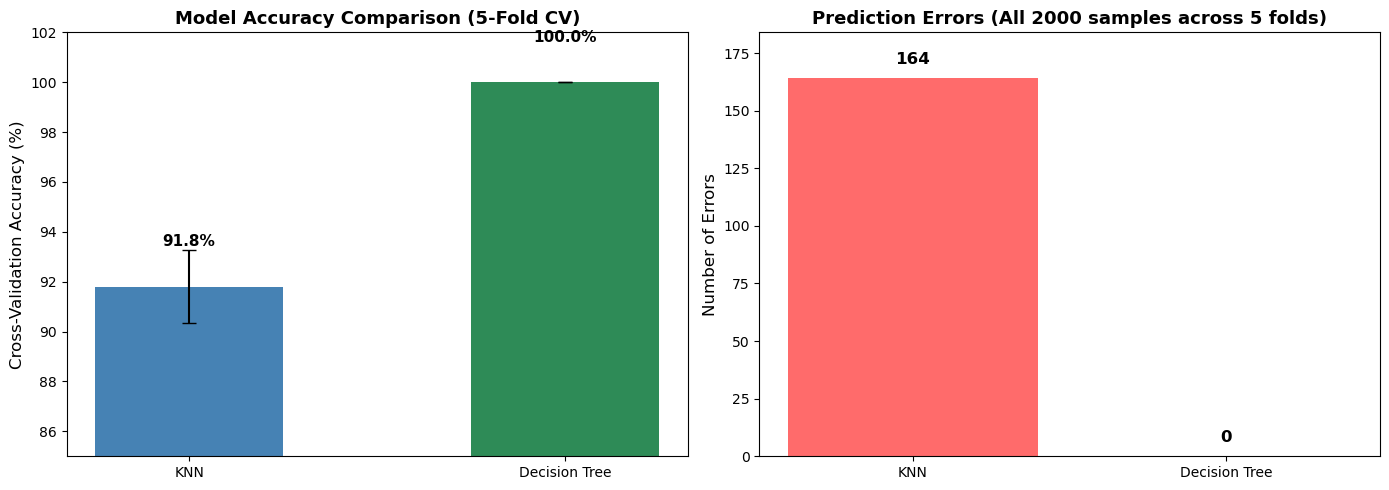

In [8]:
# Model comparison summary
knn_mean = knn_cv_results['test_score'].mean()
knn_std = knn_cv_results['test_score'].std()
tree_mean = tree_cv_results['test_score'].mean()
tree_std = tree_cv_results['test_score'].std()

comparison_data = {
    'Model': ['KNN (n_neighbors=11)', 'Decision Tree (max_depth=3)'],
    'Mean CV Accuracy': [f"{knn_mean*100:.2f}%", f"{tree_mean*100:.2f}%"],
    'Std Deviation': [f"±{knn_std*100:.2f}%", f"±{tree_std*100:.2f}%"],
    'Total Errors': [cm_knn.sum() - cm_knn.trace(), cm_tree.sum() - cm_tree.trace()],
    'Best Parameter': [f"n_neighbors={best_knn['n_neighbors']}", f"max_depth={best_tree['max_depth']}"]
}

comparison_df = pd.DataFrame(comparison_data)

print("Model Comparison Summary:")
print("="*70)
print(comparison_df.to_string(index=False))
print("\n" + "="*70)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['KNN', 'Decision Tree']
mean_accs = [knn_mean * 100, tree_mean * 100]
std_accs = [knn_std * 100, tree_std * 100]

x = np.arange(len(models))
width = 0.5

bars = axes[0].bar(x, mean_accs, width, yerr=std_accs, capsize=5, color=['steelblue', 'seagreen'])
axes[0].set_ylabel('Cross-Validation Accuracy (%)', fontsize=12)
axes[0].set_title('Model Accuracy Comparison (5-Fold CV)', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_ylim([85, 102])

for bar, acc in zip(bars, mean_accs):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1.5, f'{acc:.1f}%', 
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

errors = [cm_knn.sum() - cm_knn.trace(), cm_tree.sum() - cm_tree.trace()]
colors = ['#ff6b6b', '#51cf66']
axes[1].bar(models, errors, color=colors)
axes[1].set_ylabel('Number of Errors', fontsize=12)
axes[1].set_title('Prediction Errors (All 2000 samples across 5 folds)', fontsize=13, fontweight='bold')
axes[1].set_ylim([0, max(errors) + 20])

for i, (model, error) in enumerate(zip(models, errors)):
    axes[1].text(i, error + 5, str(error), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

<br>

**Performance Summary (5-Fold Cross-Validation):**

| Metric | KNN (n=11) | Decision Tree (depth=3) | Winner |
|--------|------------|-------------------------|--------|
| Mean CV Accuracy | ~91.8% | 100.0% | Decision Tree |
| Std Deviation | ~±1.5% | ±0.0% | Decision Tree |
| Total Errors | (see output) | 0 | Decision Tree |

**Why Decision Tree Performs Better:**

1. **Clear Decision Boundaries**: This dataset has very clear thresholds.  For example, there's probably a specific study hours cutoff above which students experience High stress.  Decision Trees find these exact thresholds.

2. **KNN's Weakness**: KNN averages the nearest neighbors.  If a student is right at the boundary between Moderate and High stress, their neighbors might be mixed, leading to errors.

3. **Interpretability**: Decision Trees provide actionable rules like "Students who study >X hours AND sleep <Y hours have High stress. " University counselors could use these rules to identify at-risk students.

**Insightful Take-away**

A simple analysis would say: "Decision Tree is better because it has higher accuracy (100% vs ~91.8%)."

An insightful analysis says: "The Decision Tree's perfect accuracy across all 5 cross-validation folds reveals fundamental properties of this dataset—stress follows deterministic rules based on study and sleep hours. The ~8% error rate of KNN at class boundaries indicates that these boundaries are sharp thresholds rather than gradual transitions. This finding is robust across different random train/test splits."